# Homework 08: Hypothesis Testing, P-values, Bootstrapping
***

**Name**: Matthew Mayer

***

This assignment is due on Canvas by **6:00PM on Friday November 4**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

The standard imports for this HW:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import norm

# Problem 1

In this HW you will need to use `.std()` when you are finding the test statistic. However, there are two kinds of standard deviations: those for a $\color{red}{\text{sample}}$ and those for a $\color{blue}{\text{population}}$.

Consider the python list below:

In [2]:
py_list = [4,2,3,4,2,3]

***(3 points)*** Find both the sample standard deviation and the popluation standard deviation by hand.

TeX your work below:



Population Standard Deviation:

First we find the mean of the list: $((4+2+3+4+2+3)/6)= 3$

Then we sum up the difference between each value and the mean: $1+1+0+1+1+0=4$

We finally can take the square root of this value over the number of values to get the population standard deviation: $\sqrt{4/6} \approx 0.8165$ 


Sample Standard Deviation:

First we find the mean of the list: $((4+2+3+4+2+3)/6)= 3$

Then we sum up the difference between each value and the mean: $1+1+0+1+1+0=4$

We finally can take the square root of this value over the number -1 of values to get the sample standard deviation: $\sqrt{4/5} \approx 0.89443$


***(2 points)*** Make an array from `py_list` and call it `np_array`.

In [3]:
# Code your answer here:
np_array = np.array(py_list)

***(2 points)*** Make a Pandas Series from the list and call it `dfSeries`.

In [4]:
# Code your answer here:
dfSeries = pd.Series(np_array)

***(2 points)*** Find `np_array.std()` and `dfSeries.std()`.

What type of standard deviation does `np_array.std()` return?

What type of standard deviation does `dfSeries.std()` return?

In [5]:
# Code your solution here:
print(np_array.std(),dfSeries.std())
print("np_array prints a population standard deviation while dfSeries prints a sample standard deviation.")

0.816496580927726 0.8944271909999159
np_array prints a population standard deviation while dfSeries prints a sample standard deviation.


***(2 points)*** Now find `np_array.std(ddof=0)` and `dfSeries.std(ddof=0)`, and `np_array.std(ddof=1)` and `dfSeries.std(ddof=1)`.

What do these return?

In [6]:
# Code your answer here:
print(np_array.std(ddof=0), "this is a population standard deviation.")
print(dfSeries.std(ddof=0), "this is a population standard deviation.")
print(np_array.std(ddof=1), "this is a sample standard deviation.")
print(dfSeries.std(ddof=1), "this is a sample standard deviation.")

0.816496580927726 this is a population standard deviation.
0.816496580927726 this is a population standard deviation.
0.8944271909999159 this is a sample standard deviation.
0.8944271909999159 this is a sample standard deviation.


# Problem 2

A nematologist is interested in determining whether a new worm food (wood bark treated with peanut butter) results in shorter worm length than the standard length of 15.7 cm.

Shorter worms are more desirable as they tend to be stronger and live longer.

The nematologist feeds a random sample of worms with the new food and subsequently obtained the worm lengths found in the `csv` file `worm.csv`.

If the nematologist has in fact discovered a healthy new worm food then this food formula can be patented and sold world wide!

Therefore, the nematologist has hired you to explain whether or not this new food outperforms (with respect to worm length) the old worm food.

***(read-in)*** Read in the csv file here:

In [7]:
# read in worm.csv
dfWorms = pd.read_csv('worm.csv')

***(1 point)*** Take a look at the first 5 rows of data.

In [8]:
# code here for looking at data:
dfWorms.head()

,length
0,11.5
1,15.2
2,16.5
3,15.1
4,11.8


In order to determine whether or not this new worm food outperforms the standard food, you and the nematologist decide on a hypthesis test run at the 5% significance level.

***(2 points)*** What does a 5% significance level mean?


Solution:
This would mean it's a one tail hypothesis test with 5% on the tail that determines if we abandon our null hypothesis.

***(2 points)*** What is the null hypothesis and alternate hypothesis for this test?

Solution:

$N_0$: The new worm food does not outperform the current food and any major difference would be a result of statistical error.

$N_A$: The new worm food outperforms the current worm food.

***(1 point)*** How many worms were in this sample?

In [9]:
# code your answer here:

print("There are", dfWorms.count()[0], "worms in the sample.")

There are 33 worms in the sample.


***(1 point)*** What is the mean of the sample?

In [10]:
# Code your solution here:
meanWorm = dfWorms.mean()[0]
print("The mean of the sample is:", meanWorm )

The mean of the sample is: 13.663636363636364


***(1 point)*** What is the standard deviation of the sample?


In [11]:
# Code your answer here:
standardWorm = dfWorms.std(ddof=1)[0]
print("The standard deviation of the sample is", standardWorm)

The standard deviation of the sample is 2.5435971307650833


***(2 points)*** What is the critical value?

In [12]:
# Code your answer here:
z=-1*stats.norm.ppf(.95)
print("The critical values is", z)

The critical values is -1.6448536269514722


***(2 points)*** What is the test statistic?

In [13]:
# Code your answer here:
testS = (meanWorm - 15.7)/(standardWorm/np.sqrt(33))
print("The test statistic is equal to", testS)

The test statistic is equal to -4.599006005602886


***(3 points)*** What is the conclusion?


Solution:
This -4.6 value is way beyond our critical -1.64 value. Because of this we can discard our null hypothesis and at the 5% signifigance level can conclude that the sample of worms with the food were smaller than the other sample.

Instead of using a critical value to determine the above answer about the worm food, suppose you decide to base your decision on the p-value for this same data.

***(2 points)*** In general, what is it that a p-value measures?

Solution:
A p-value is the probability, under the Null hypothesis, that we would get a test statistic at least as extreme as the one we calculated.

***(2 points)*** What is the p-value for this experiment?

In [14]:
# Code your answer here:
p = stats.norm.cdf(testS)
print("The p-value is", p)

The p-value is 2.1225577307875395e-06


***(2 points)*** According to the p-value, should we reject the null or fail to reject the null?

Solution:

According to the p-vale we must reject the null hypothesis since $p\leq\alpha$.

***(2 points)*** Will the decisions concerning rejecting the null ever be different with respect to using a critical number versus a p-value?

Solution:
No these two methods of hypothesis testing will never disagree. This is because of the relationship between critical numbers and p-values. p-values essentially look at the areas under the curve and compares those. Critical numbers essentially look at how far left on the curve you have to be. Both of these methods will agree because how far left a value is controls the area under the curve to the left of that point.

***(2 points)*** According to the acquired p-value what is the largest confidence interval we could have used to reject the null hypothesis?

In [15]:
# Code you solution here
ci = 1-p
print("The largest confidnce interval is", ci)

The largest confidnce interval is 0.9999978774422692


# Problem 3
***
Widg's are fairly rare and difficult to come by.


In order to determine the density of a widg, one must destroy them with a crushing mechanism. A sample of of $n=200$ widg densities has been determined.

From this sample, we would like to determine the probable density of other widgs' in the population. Of course we don't want to crush anymore widgs and they are hard to come by, so we will have to make due with this one sample.

The csv file `strap.csv` is the sample ($n=200$) obtained from a distribution of widg densities. 

***(read-in)*** load the csv into a dataframe called dfWidg.

In [31]:
# Code your work here:
dfWidg = pd.read_csv("strap.csv")
dfWidg.head()

,widg
0,2
1,3
2,3
3,1
4,1


***(4 points)*** Write a function to draw $10000$ bootstrapped resamples (with replacement) from this sample of 200 widg densities and compute a bootstrapped confidence interval for the mean at the 90% confidence level.


In [32]:
# Code your answer here:
def bootstrapped_mean(sample, num_boots=10000):
    
    list_of_means = []
    
    for i in range(0,num_boots):
        resample = np.random.choice(sample,size = len(sample))
        mean_resample = np.mean(resample)
        list_of_means.append(mean_resample)
    L = np.percentile(list_of_means,5)
    U = np.percentile(list_of_means,95)
    
    CI = [L, U]
    return CI 
    
bootstrapped_mean(dfWidg['widg'])

[2.39, 2.705]

***(2 points)*** What is the meaning of this 90% CI?

Solution:
This means that there is a 90% chance that the population mean falls in this interval.

***(4 points)*** write a function that will graph a $\color{red}{\text{histogram}}$ of our 10000 bootstrap samples with the $\color{blue}{\text{confidence interval}}$ superimposed on the histogram.

BTW, choose your own colors: https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/


[2.35, 2.74]

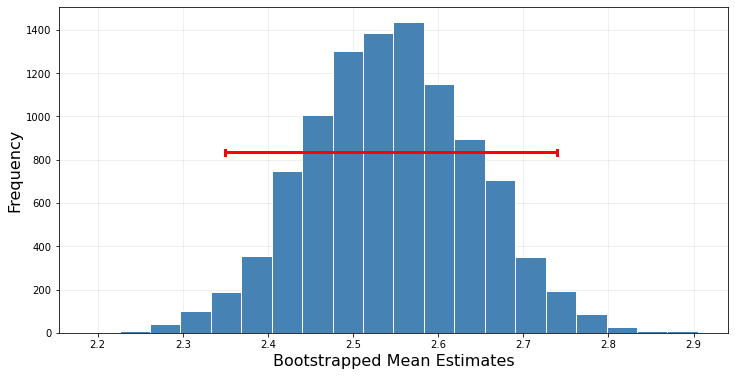

In [33]:
# Code your answer here:
def bootstrapped_mean(sample, num_boots=10000):
    
    list_of_means = []
    
    for i in range(0,num_boots):
        resample = np.random.choice(sample,size = len(sample))
        mean_resample = np.mean(resample)
        list_of_means.append(mean_resample)
    L = np.percentile(list_of_means,2.5)
    U = np.percentile(list_of_means,97.5)
    
    CI = [L, U]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_means).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    return CI 
bootstrapped_mean(dfWidg['widg'])

***(2 points)*** What is the mean of the $n=200$ data, and is this mean found inside the bootstrap CI?

In [38]:
# Code your solution here:
mean = dfWidg.mean()[0]
print("The mean is", mean, "this mean is found inside of the bootstrap confidence interval.")

The mean is 2.545 this mean is found inside of the bootstrap confidence interval.


***(2 points)*** Graph a histogram of our 10000 bootstrap samples with the confidence interval superimposed on the histogram, AND the sample mean as a dot on the CI. BTW, the actual population mean is 2.5. You likely arrived at a mean that is very close to this. 

[2.36, 2.735]

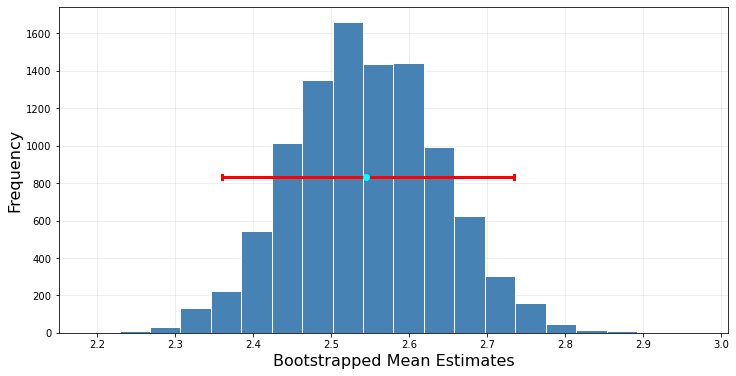

In [49]:
# Code your answer here:
def bootstrapped_mean(sample, num_boots=10000):
    
    list_of_means = []
    
    for i in range(0,num_boots):
        resample = np.random.choice(sample,size = len(sample))
        mean_resample = np.mean(resample)
        list_of_means.append(mean_resample)
    L = np.percentile(list_of_means,2.5)
    U = np.percentile(list_of_means,97.5)
    
    CI = [L, U]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_means).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot(mean,835, marker = 'o', color = "cyan")
    return CI 
bootstrapped_mean(dfWidg['widg'])